In [1]:
import pandas as pd

In [2]:
diabetes_df = pd.read_csv("diabetes_prediction_dataset.csv")
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
diabetes_df['age'] = diabetes_df['age'].astype(int)

In [5]:
diabetes_df.isnull().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [6]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
print(diabetes_df.shape)
duplicates = diabetes_df.duplicated()
print(duplicates.sum())
diabetes_df = diabetes_df[~duplicates]
print(diabetes_df.shape)

(100000, 9)
3888
(96112, 9)


In [8]:
diabetes_df["diabetes"].value_counts()

diabetes
0    87630
1     8482
Name: count, dtype: int64

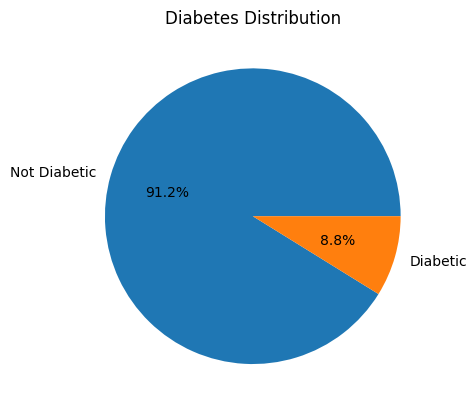

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df):
  fig, ax = plt.subplots()
  ax.pie(df["diabetes"].value_counts(), labels = ["Not Diabetic", "Diabetic"], autopct='%1.1f%%')
  ax.set_title("Diabetes Distribution")
  plt.show()
plot_distribution(diabetes_df)

In [10]:
cat_features = diabetes_df.columns[diabetes_df.dtypes == "object"].tolist()
num_features = diabetes_df.columns[(diabetes_df.dtypes == "float64" )|( diabetes_df.dtypes == "int64") ].tolist()

In [11]:
diabetes_df = diabetes_df[diabetes_df["age"] >= 1]
diabetes_df.shape

(95212, 9)

In [12]:
diabetes_df[num_features].corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.256417,0.238709,0.328268,0.106017,0.114224,0.263804
hypertension,0.256417,1.000000,0.119469,0.145824,0.081362,0.084789,0.194998
heart_disease,0.238709,0.119469,1.000000,0.059178,0.068118,0.070826,0.170198
bmi,0.328268,0.145824,0.059178,1.000000,0.083333,0.092161,0.213206
HbA1c_level,0.106017,0.081362,0.068118,0.083333,1.000000,0.173050,0.407838
blood_glucose_level,0.114224,0.084789,0.070826,0.092161,0.173050,1.000000,0.425606
diabetes,0.263804,0.194998,0.170198,0.213206,0.407838,0.425606,1.000000


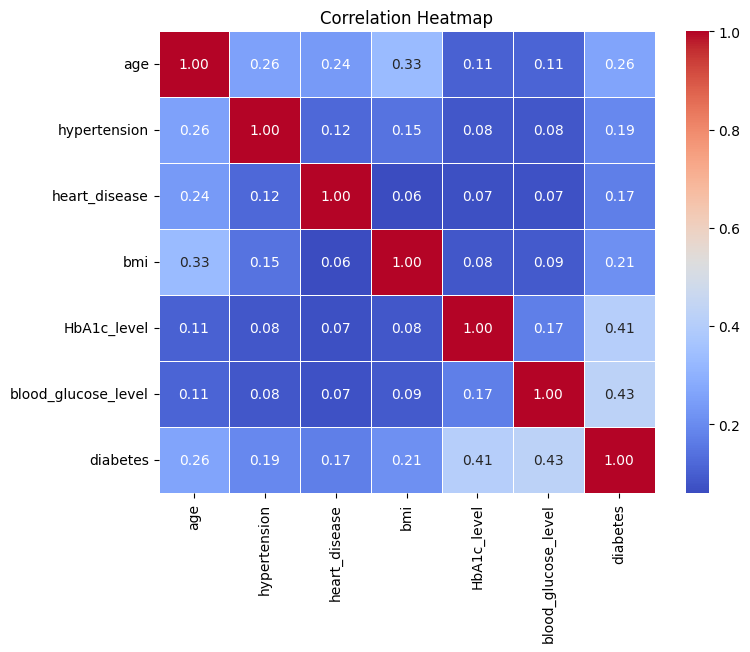

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_df[num_features].corr(), annot=True, cmap="coolwarm",  fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
#dropping categorical variables
diabetes_df.drop(cat_features,axis=1, inplace = True)

In [15]:
## categorical variables often provide uniqueness. correcting for some duplication
# that might happen because the categorical variables were dropped
print(diabetes_df.shape)
duplicates = diabetes_df.duplicated()
print(duplicates.sum())
diabetes_df = diabetes_df[~duplicates]
print(diabetes_df.shape)

(95212, 7)
9071
(86141, 7)


In [16]:
diabetes_df.diabetes.value_counts()

diabetes
0    77742
1     8399
Name: count, dtype: int64

## HANDLING CLASS IMBALANCE

In [17]:
# solving unbalanced dataset problem using ydata_synthetic.synthesizers
from helper_functions import generate_data, synthetic_data_model, patient_id_and_date

#Synthesize the minority class
training_df = diabetes_df.loc[diabetes_df['diabetes'] == 1].copy()
training_df.head()

2024-07-13 17:06:37.262849: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 17:06:37.309655: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-13 17:06:37.309696: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-13 17:06:37.311249: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-13 17:06:37.319102: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-13 17:06:37.319904: I tensorflow/core/platform/cpu_feature_guard.cc:1

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
6,44,0,0,19.31,6.5,200,1
26,67,0,1,27.32,6.5,200,1
38,50,1,0,27.32,5.7,260,1
40,73,0,0,25.91,9.0,160,1
53,53,0,0,27.32,7.0,159,1


In [18]:
synth, train_args = generate_data()
synth.fit(data=training_df, train_arguments=train_args, num_cols=num_features, cat_cols=['diabetes'])


Epoch: 0 | critic_loss: 0.25193196535110474 | generator_loss: -0.21055461466312408
Epoch: 1 | critic_loss: -0.007068663835525513 | generator_loss: 0.1401851326227188
Epoch: 2 | critic_loss: -0.10844311118125916 | generator_loss: 0.20721742510795593
Epoch: 3 | critic_loss: 0.8729175329208374 | generator_loss: -0.9931082725524902
Epoch: 4 | critic_loss: 0.06254251301288605 | generator_loss: -0.3609254062175751
Epoch: 5 | critic_loss: -0.30087360739707947 | generator_loss: 0.35718250274658203
Epoch: 6 | critic_loss: -0.19946973025798798 | generator_loss: -0.18341311812400818
Epoch: 7 | critic_loss: 0.03866355121135712 | generator_loss: -0.4040732681751251
Epoch: 8 | critic_loss: 0.36044564843177795 | generator_loss: -0.7399652004241943
Epoch: 9 | critic_loss: -0.07682502269744873 | generator_loss: -0.015355794690549374
Epoch: 10 | critic_loss: 0.5801423788070679 | generator_loss: -1.0367631912231445
Epoch: 11 | critic_loss: 0.004415541887283325 | generator_loss: -0.38618457317352295
Epoch

In [19]:
synth_data = synth.sample(67000)
synth_data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,65,0,0,27.230185,6.055225,156,1
1,73,0,0,27.416126,5.988187,204,1
2,35,0,0,31.735055,6.500285,158,1
3,9,1,0,32.589829,8.726079,158,1
4,71,0,0,26.964685,6.619878,197,1


In [20]:
synth_data["bmi"] = synth_data["bmi"].round(2)
synth_data["HbA1c_level"] = synth_data["HbA1c_level"].round(1)

In [21]:
combined_data = pd.concat([diabetes_df, synth_data], ignore_index=True)
combined_data.shape

(153141, 7)

In [22]:
duplicates = combined_data.duplicated()
combined_data = combined_data[~duplicates]
combined_data.shape

(152723, 7)

In [23]:
conditions = (
    (combined_data['age'] >= 1) & (combined_data['age'] <= 120) &
    (combined_data['bmi'] >= 10) & (combined_data['bmi'] <= 100) &
    (combined_data['HbA1c_level'] >= 3) & (combined_data['HbA1c_level'] <= 15) &
    (combined_data['blood_glucose_level'] >= 50) & (combined_data['blood_glucose_level'] <= 400)
)

combined_data = combined_data[conditions]
combined_data.shape

(152686, 7)

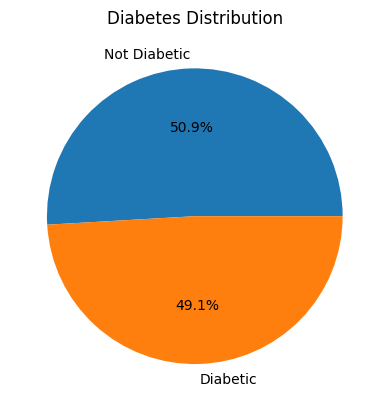

In [24]:
plot_distribution(combined_data)

In [25]:
combined_data = combined_data.sample(frac=1).reset_index(drop=True)
print(combined_data.diabetes.value_counts())
combined_data.head(10)

diabetes
0    77742
1    74944
Name: count, dtype: int64


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,64,0,0,27.27,8.9,197,1
1,8,0,0,18.26,4.5,85,0
2,46,0,0,30.06,6.0,140,0
3,78,0,0,23.52,6.0,258,1
4,23,0,0,24.21,5.7,160,0
5,72,0,0,27.37,5.7,280,1
6,75,0,0,28.07,6.0,160,1
7,40,0,0,40.88,5.8,90,0
8,45,0,0,20.27,6.6,159,0
9,78,0,0,27.25,8.1,284,1


<h2>creating a model to synthesize data for feature pipeline</h2>

In [26]:
synth,_ = generate_data()
synth.fit(data=combined_data, train_arguments=train_args, num_cols=num_features, cat_cols=['diabetes'])

Epoch: 0 | critic_loss: 0.32279545068740845 | generator_loss: -0.7852216958999634
Epoch: 1 | critic_loss: 0.2584627866744995 | generator_loss: -1.7154935598373413
Epoch: 2 | critic_loss: 0.06445722281932831 | generator_loss: -1.8333796262741089
Epoch: 3 | critic_loss: 0.13482239842414856 | generator_loss: -1.9658112525939941
Epoch: 4 | critic_loss: 0.06326830387115479 | generator_loss: -1.9043424129486084
Epoch: 5 | critic_loss: 0.048238605260849 | generator_loss: -1.8758413791656494
Epoch: 6 | critic_loss: 0.1403599977493286 | generator_loss: -2.311321258544922
Epoch: 7 | critic_loss: 0.08802513778209686 | generator_loss: -2.1548874378204346
Epoch: 8 | critic_loss: 0.14186212420463562 | generator_loss: -2.1832358837127686
Epoch: 9 | critic_loss: 0.08276787400245667 | generator_loss: -2.1046998500823975
Epoch: 10 | critic_loss: 0.041711851954460144 | generator_loss: -2.207245111465454
Epoch: 11 | critic_loss: 0.07876987010240555 | generator_loss: -2.267357587814331
Epoch: 12 | critic_l

In [27]:
import os
model_dir="synth_data_model"
if os.path.isdir(model_dir) == False:
    os.mkdir(model_dir)

synth.save(model_dir + "/synth_data_model.pkl")

In [28]:
#loading and testing synthetic_data_model for 
model = synthetic_data_model(model_dir, "/synth_data_model.pkl")
new_synth_data = model.sample(100)
new_synth_data.diabetes.value_counts()

diabetes
0    53
1    47
Name: count, dtype: int64

<h3>Writing features to a feature store </h3>

In [29]:
##adding a datetime column to the dataframe before saving it in feature store 
combined_data = patient_id_and_date(combined_data)
combined_data.head(3)

,patient_id,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,datetime
0,0,64,0,0,27.27,8.9,197,1,2024-07-13 19:47:34.866136
1,1,8,0,0,18.26,4.5,85,0,2024-07-13 19:47:34.866136
2,2,46,0,0,30.06,6.0,140,0,2024-07-13 19:47:34.866136


In [30]:
combined_data = combined_data.sample(frac=1).reset_index(drop=True)
combined_data.head(3)

,patient_id,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,datetime
0,77206,27,1,0,27.32,5.0,200,0,2024-07-13 19:47:34.866136
1,124666,78,0,0,27.29,6.8,157,1,2024-07-13 19:47:34.866136
2,78954,80,0,0,22.95,6.6,140,0,2024-07-13 19:47:34.866136


In [31]:
from dotenv import load_dotenv
load_dotenv()
hopswork_key = os.getenv("HOPSWORK_KEY")

In [32]:
import hopsworks
project = hopsworks.login(api_key_value=hopswork_key)
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/112801
Connected. Call `.close()` to terminate connection gracefully.


In [33]:
fg = fs.get_or_create_feature_group(
    name="diabetes_features",
    version=1,
    primary_key=['patient_id', 'datetime'],  
    event_time='datetime',
    description="Features for diabetes prediction"
)

In [34]:
fg.insert(combined_data)

2024-07-13 20:56:50,403 WARNING: FeatureGroupWarning: The ingested dataframe contains upper case letters in feature names: `['HbA1c_level']`. Feature names are sanitized to lower case in the feature store.

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/112801/fs/112720/fg/994676


Uploading Dataframe: 0.00% |          | Rows 0/152686 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: diabetes_features_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/112801/jobs/named/diabetes_features_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7fda0bda3eb0>, None)